In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt

from neural_astar.planner import NeuralAstar
from neural_astar.utils.data_sdd import create_sdd_dataloader
from neural_astar.utils.training import load_from_ptl_checkpoint

/home/sam/Desktop/Tesi/neural-astar/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


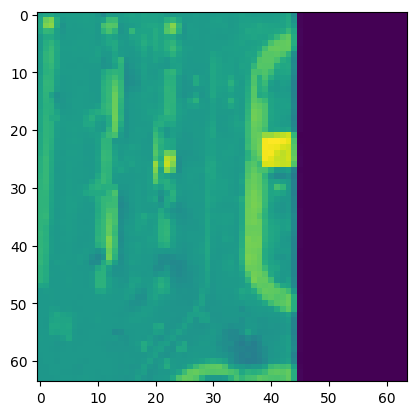

In [3]:
dataloader = create_sdd_dataloader("/home/sam/Desktop/Tesi/neural-astar/planning-datasets/data/sdd/s064_0.5_128_300/bookstore/video0/", 10)
map_designs, start_maps, goal_maps, opt_trajs = next(iter(dataloader))

plt.imshow(map_designs[0][0])

In [8]:
model = NeuralAstar(encoder_input="rgb+", encoder_arch="CNN", encoder_depth=3, learn_obstacles=True, Tmax=1.0, const=10.)
#model.state_dict(), model.load_state_dict(load_from_ptl_checkpoint("../model/12x12/lightning_logs"))

In [4]:
outputs = model(map_designs, start_maps, goal_maps)

t = 0
fig, axes = plt.subplots(1, 3, figsize=[6, 2])
axes[0].imshow(map_designs[t].permute(1, 2, 0))
axes[0].axis("off")
axes[1].imshow(opt_trajs[t, 0])
axes[0].set_title("Input image")
axes[1].axis("off")
axes[1].set_title("Ground truth path")
axes[2].imshow(outputs.paths[t, 0])
axes[2].axis("off")
axes[2].set_title("Neural A* path")
fig.tight_layout()
plt.savefig("../assets/warcraft.png")

/home/sam/Desktop/Tesi/neural-astar/.venv/lib/python3.8/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
